# Perform fCUBT on the data

In [1]:
# Load packages
import matplotlib
import matplotlib.pyplot as plt
import pickle

from FDApy.clustering.fcubt import Node, FCUBT
from FDApy.representation.functional_data import DenseFunctionalData
from FDApy.preprocessing.dim_reduction.fpca import UFPCA

from matplotlib import colors as mcolors
COLORS = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

#matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
# Load data
with open('./data/scenario_1_review.pkl', 'rb') as f:
    data_fd = pickle.load(f)
with open('./data/labels_review.pkl', 'rb') as f:
    labels = pickle.load(f)

In [3]:
# Do UFPCA on the data
fpca = UFPCA(n_components=0.99)
fpca.fit(data_fd, method='GAM')
    
# Compute scores
simu_proj = fpca.transform(data_fd, method='NumInt')

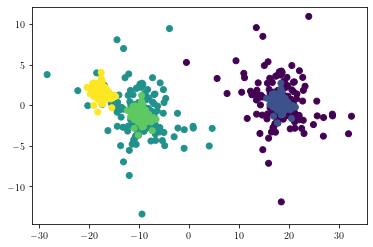

In [4]:
plt.scatter(simu_proj[:, 0], simu_proj[:, 1], c=labels)
plt.show()

In [5]:
# Build the tree
root_node = Node(data_fd, is_root=True)
fcubt = FCUBT(root_node=root_node)

In [6]:
# Growing
fcubt.grow(n_components=0.95, min_size=10)

In [7]:
fcubt.mapping_grow

{Node(id=(2, 0), is_root=False, is_leaf=True): 0,
 Node(id=(2, 1), is_root=False, is_leaf=True): 1,
 Node(id=(3, 5), is_root=False, is_leaf=True): 2,
 Node(id=(3, 6), is_root=False, is_leaf=True): 3,
 Node(id=(4, 8), is_root=False, is_leaf=True): 4,
 Node(id=(4, 9), is_root=False, is_leaf=True): 5,
 Node(id=(4, 14), is_root=False, is_leaf=True): 6,
 Node(id=(4, 15), is_root=False, is_leaf=True): 7}

In [8]:
# Joining
fcubt.join(n_components=0.95)

In [9]:
fcubt.mapping_join

{Node(id=(2, 0), is_root=False, is_leaf=True): 0,
 Node(id=(2, 1), is_root=False, is_leaf=True): 1,
 Node(id=(3, 6), is_root=False, is_leaf=True): 2,
 Node(id=(4, 14), is_root=False, is_leaf=True): 3,
 Node(id=[(4, 9), (4, 15)], is_root=False, is_leaf=True): 4,
 Node(id=[(3, 5), (4, 8)], is_root=False, is_leaf=True): 5}